<a href="https://colab.research.google.com/github/julio4development/pytorch1/blob/main/gpu_022023_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'1.13.1+cu116'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
weight = 0.7
bias = 0.3
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [ ]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [ ]:
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

In [ ]:
# Visualization of the initial data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")
  plt.legend(prop={"size": 14});

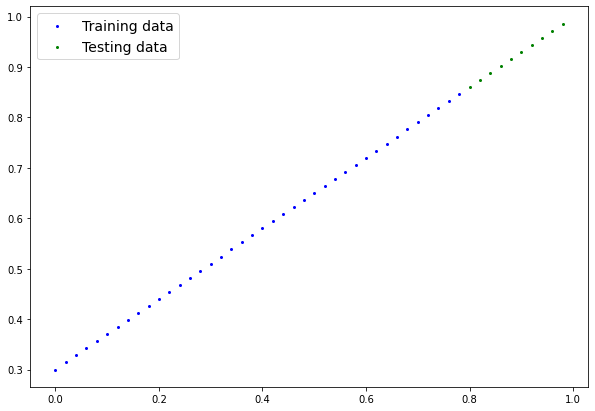

In [ ]:
plot_predictions()

In [ ]:
print(device)

cuda


In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
print(device)

cuda


In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.L1Loss()

In [ ]:
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
epochs = 1000
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} - Train loss: {loss} - Test loss: {test_loss}")

Epoch: 0 - Train loss: 0.1902354210615158 - Test loss: 0.031564176082611084
Epoch: 100 - Train loss: 0.040203195065259933 - Test loss: 0.09292414039373398
Epoch: 200 - Train loss: 0.005866314750164747 - Test loss: 0.012946558184921741
Epoch: 300 - Train loss: 0.010248985141515732 - Test loss: 0.00029267073841765523
Epoch: 400 - Train loss: 0.010248985141515732 - Test loss: 0.00029267073841765523
Epoch: 500 - Train loss: 0.010248985141515732 - Test loss: 0.00029267073841765523
Epoch: 600 - Train loss: 0.010248985141515732 - Test loss: 0.00029267073841765523
Epoch: 700 - Train loss: 0.010248985141515732 - Test loss: 0.00029267073841765523
Epoch: 800 - Train loss: 0.010248985141515732 - Test loss: 0.00029267073841765523
Epoch: 900 - Train loss: 0.010248985141515732 - Test loss: 0.00029267073841765523


In [ ]:
from pprint import pprint
pprint(model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.7070]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3075], device='cuda:0'))])


In [ ]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

In [ ]:
y_preds

tensor([[0.8731],
        [0.8873],
        [0.9014],
        [0.9156],
        [0.9297],
        [0.9438],
        [0.9580],
        [0.9721],
        [0.9863],
        [1.0004]], device='cuda:0')

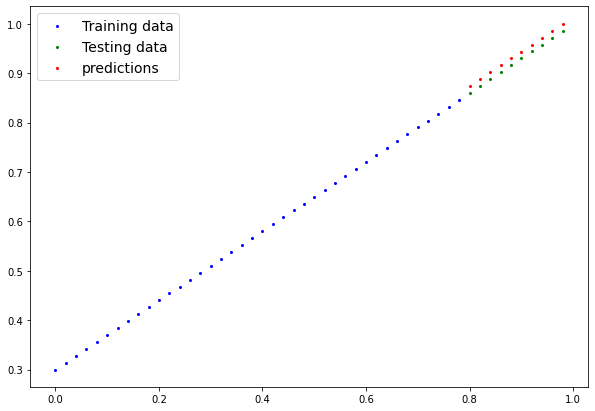

In [ ]:
plot_predictions(predictions=y_preds.cpu())